In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv('E:\\infosys\\Datasets-20250212T130626Z-001\\Datasets\\matches.csv')
print(df)

           id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

                                       

In [65]:
print(df.isnull().sum())

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [66]:
print(df.player_of_match)

0           BB McCullum
1            MEK Hussey
2           MF Maharoof
3            MV Boucher
4             DJ Hussey
             ...       
1090    Abhishek Sharma
1091           MA Starc
1092           R Ashwin
1093      Shahbaz Ahmed
1094           MA Starc
Name: player_of_match, Length: 1095, dtype: object


In [67]:
df1=pd.read_csv('E:\\infosys\\Datasets-20250212T130626Z-001\\Datasets\\deliveries.csv')
print(df1)
print(df1.columns)

        match_id  inning           batting_team                 bowling_team  \
0         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
1         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
2         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
3         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
4         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
...          ...     ...                    ...                          ...   
260915   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260916   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260917   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260918   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260919   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   

        over  ball       batter        

In [68]:
print(df1.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


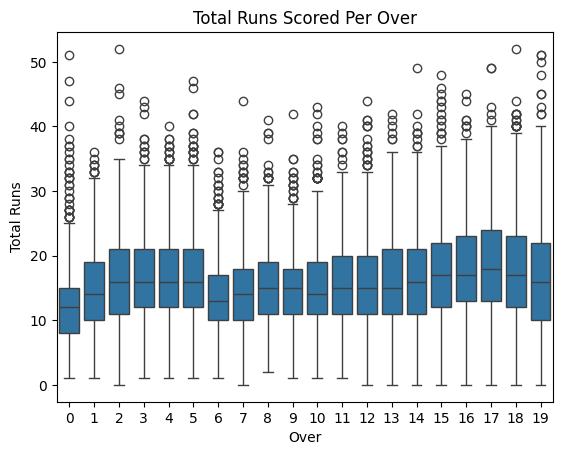

In [73]:
# 1. Total Runs Scored Per Over
runs_per_over = df1.groupby(['match_id', 'over'])['total_runs'].sum().reset_index()
sns.boxplot(data=runs_per_over, x='over', y='total_runs')
plt.title('Total Runs Scored Per Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()

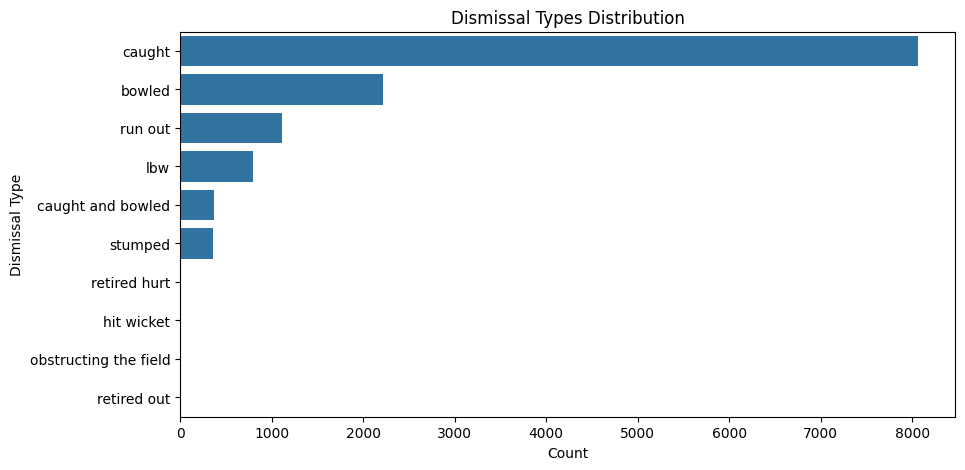

In [34]:
# 2. Dismissal Types Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df1['dismissal_kind'], order=df1['dismissal_kind'].value_counts().index)
plt.title('Dismissal Types Distribution')
plt.xlabel('Count')
plt.ylabel('Dismissal Type')
plt.show()

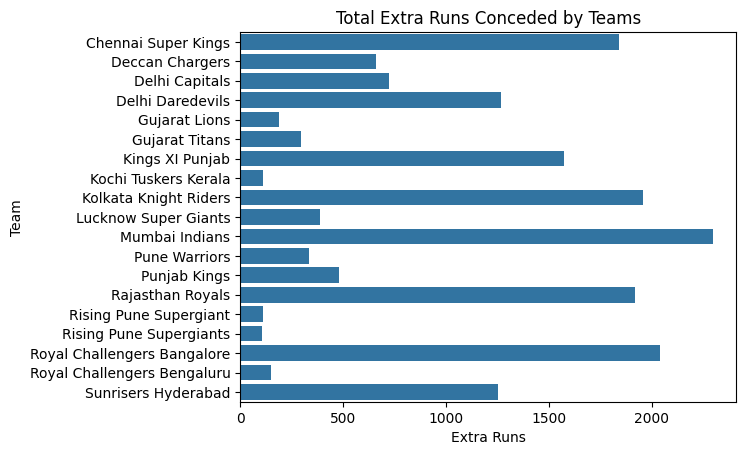

In [35]:
# 3. Total Extra Runs Conceded by Teams
extra_runs = df1.groupby('bowling_team')['extra_runs'].sum().reset_index()
sns.barplot(data=extra_runs, x='extra_runs', y='bowling_team')
plt.title('Total Extra Runs Conceded by Teams')
plt.xlabel('Extra Runs')
plt.ylabel('Team')
plt.show()

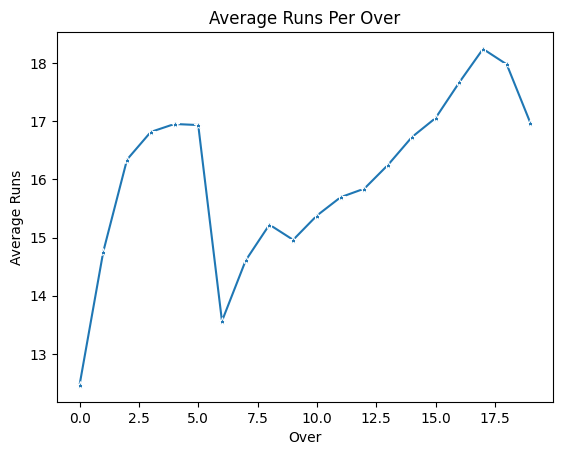

In [47]:
# 4. Average Runs Per Over
avg_runs_per_over = runs_per_over.groupby('over')['total_runs'].mean().reset_index()
sns.lineplot(data=avg_runs_per_over, x='over', y='total_runs', marker='*')
plt.title('Average Runs Per Over')
plt.xlabel('Over')
plt.ylabel('Average Runs')
plt.show()

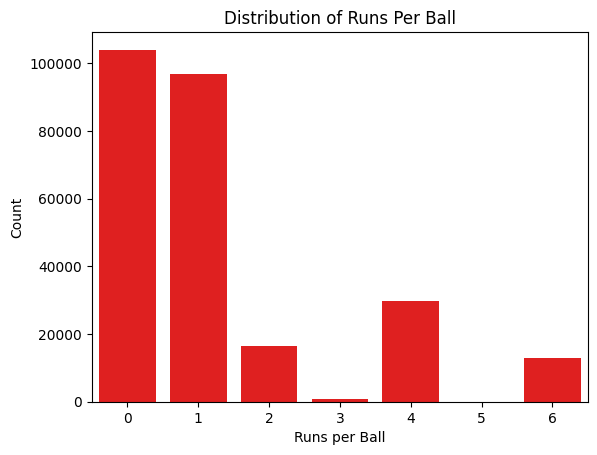

In [46]:
# 5. Distribution of Runs Per Ball
runs_per_ball = df1['batsman_runs'].value_counts().sort_index()
sns.barplot(x=runs_per_ball.index, y=runs_per_ball.values,color='red')
plt.title('Distribution of Runs Per Ball')
plt.xlabel('Runs per Ball')
plt.ylabel('Count')
plt.show()

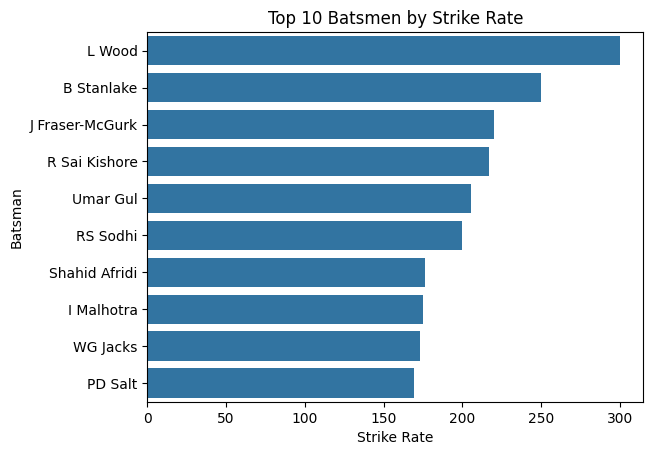

In [54]:
# 6. Top 10 Batsmen by Strike Rate
df1 = df1.rename(columns={'batsman_name': 'batsman'})
batsman_stats = df1.groupby('batter').agg({'batsman_runs': 'sum', 'ball': 'count'}).reset_index()
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['ball']) * 100
top_batsmen = batsman_stats.nlargest(10, 'strike_rate')
sns.barplot(data=top_batsmen, x='strike_rate', y='batter')
plt.title('Top 10 Batsmen by Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.show()

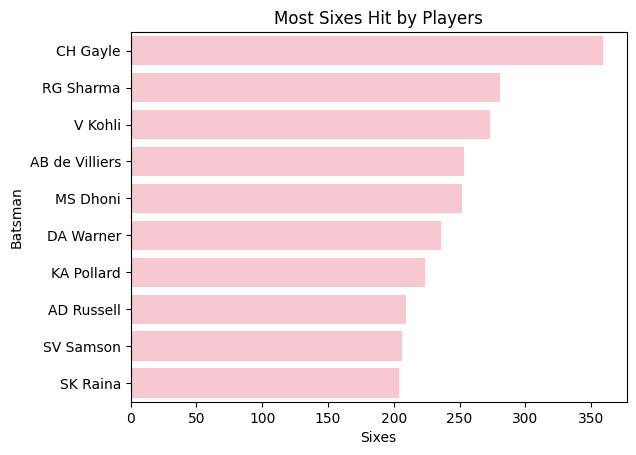

In [57]:
# 7. Most Sixes Hit by Players
sixes = df1[df1['batsman_runs'] == 6].groupby('batter').size().reset_index(name='sixes')
top_six_hitters = sixes.nlargest(10, 'sixes')
sns.barplot(data=top_six_hitters, x='sixes', y='batter',color='pink')
plt.title('Most Sixes Hit by Players')
plt.xlabel('Sixes')
plt.ylabel('Batsman')
plt.show()


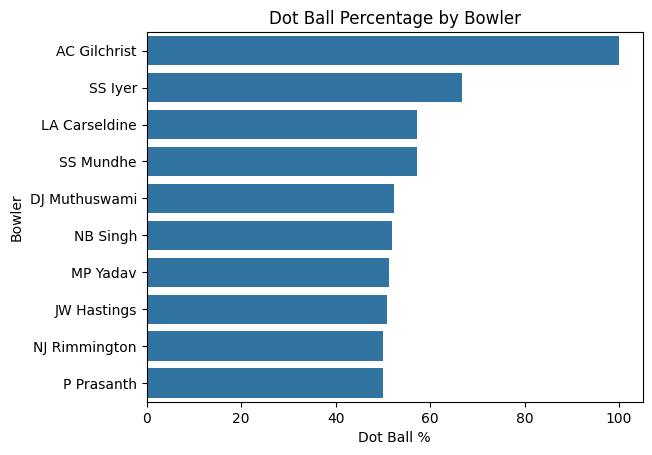

In [40]:
# 8. Dot Ball Percentage by Bowler
dot_balls = df1[df1['total_runs'] == 0].groupby('bowler').size()
total_balls = df1.groupby('bowler').size()
dot_ball_percentage = (dot_balls / total_balls * 100).reset_index(name='dot_ball_percentage')
top_dot_bowlers = dot_ball_percentage.nlargest(10, 'dot_ball_percentage')
sns.barplot(data=top_dot_bowlers, x='dot_ball_percentage', y='bowler')
plt.title('Dot Ball Percentage by Bowler')
plt.xlabel('Dot Ball %')
plt.ylabel('Bowler')
plt.show()

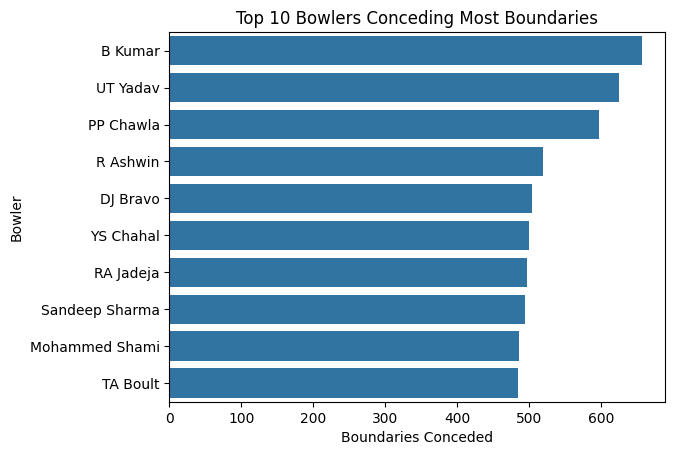

In [76]:
# 9. Top 10 Bowlers Conceding Most Boundaries
boundaries = df1[df1['batsman_runs'].isin([4, 6])].groupby('bowler').size().reset_index(name='boundaries')
top_boundary_bowlers = boundaries.nlargest(10, 'boundaries')
sns.barplot(data=top_boundary_bowlers, x='boundaries', y='bowler')
plt.title('Top 10 Bowlers Conceding Most Boundaries')
plt.xlabel('Boundaries Conceded')
plt.ylabel('Bowler')
plt.show()


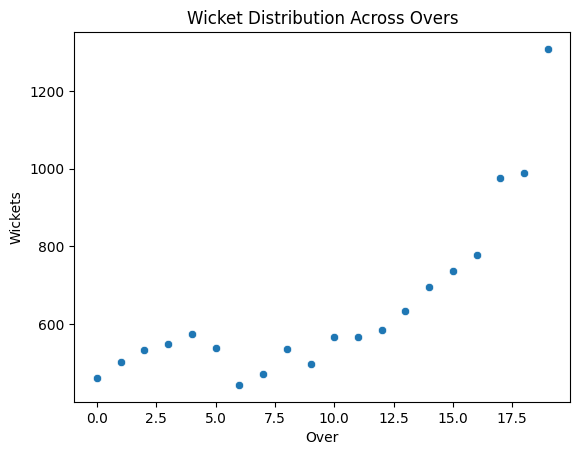

In [74]:
# 10. Wicket Distribution Across Overs
wickets = df1[df1['dismissal_kind'].notna()].groupby('over').size().reset_index(name='wickets')
sns.scatterplot(data=wickets, x='over', y='wickets', marker='o')
plt.title('Wicket Distribution Across Overs')
plt.xlabel('Over')
plt.ylabel('Wickets')
plt.show()

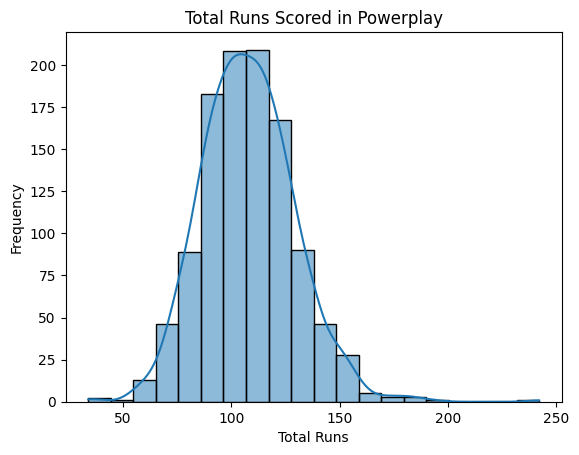

In [43]:
# 11. Total Runs Scored in Powerplay
powerplay_runs = df1[df1['over'] <= 6].groupby('match_id')['total_runs'].sum().reset_index()
sns.histplot(powerplay_runs['total_runs'], bins=20, kde=True)
plt.title('Total Runs Scored in Powerplay')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

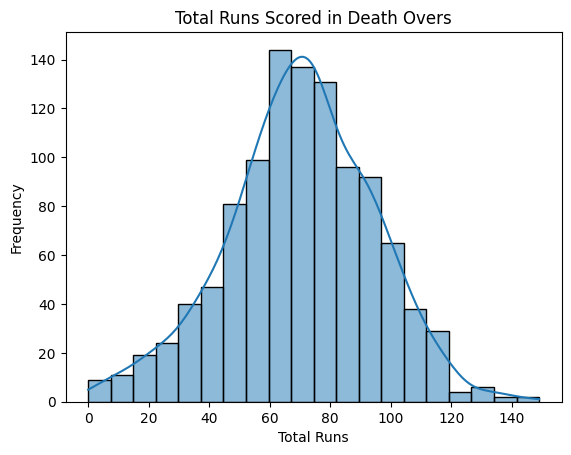

In [44]:
# 12. Total Runs Scored in Death Overs
death_runs = df1[df1['over'] >= 16].groupby('match_id')['total_runs'].sum().reset_index()
sns.histplot(death_runs['total_runs'], bins=20, kde=True)
plt.title('Total Runs Scored in Death Overs')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()


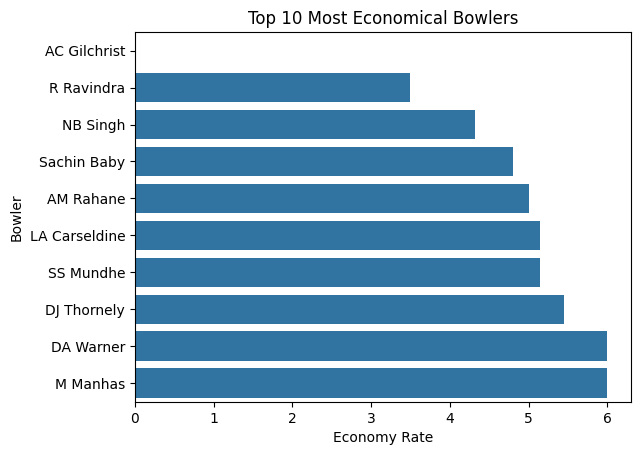

In [45]:
# 13. Top 10 Most Economical Bowlers
economy = df1.groupby('bowler').agg({'total_runs': 'sum', 'ball': 'count'}).reset_index()
economy['economy_rate'] = (economy['total_runs'] / economy['ball']) * 6
top_economical_bowlers = economy.nsmallest(10, 'economy_rate')
sns.barplot(data=top_economical_bowlers, x='economy_rate', y='bowler')
plt.title('Top 10 Most Economical Bowlers')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.show()